In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [8]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

trainset = ImageFolder("S:/Summer25/MineDataset/Annotation_Done/MNIST_Format/train", transform=transform)
testset  = ImageFolder("S:/Summer25/MineDataset/Annotation_Done/MNIST_Format/val",   transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader  = DataLoader(testset,  batch_size=32, shuffle=False)

print("Train:", len(trainset), "Val:", len(testset))
print("Num classes:", len(trainset.classes))
print("Class folders:", trainset.classes[:5], "...")


Train: 2774 Val: 702
Num classes: 13
Class folders: ['0', '1', '10', '11', '12'] ...


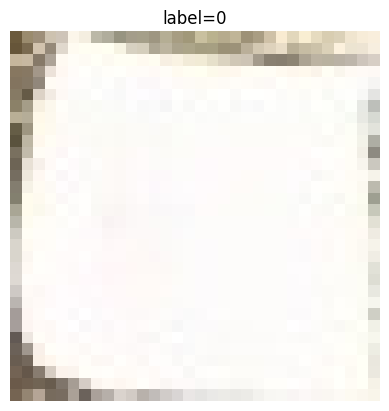

In [9]:
img, y = trainset[0]
plt.imshow(img.permute(1,2,0))
plt.title(f"label={y}")
plt.axis("off")
plt.show()


In [11]:
from collections import Counter

In [12]:
labels = [y for _, y in trainset]
print(Counter(labels))


Counter({11: 358, 2: 265, 10: 263, 5: 259, 7: 254, 1: 228, 9: 215, 12: 203, 6: 174, 4: 173, 0: 148, 8: 120, 3: 114})


In [13]:
from models import CNNMineSigns  # adjust import to your file name

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNMineSigns(num_classes=13).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [14]:
EPOCHS = 5

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for x, y in trainloader:
        x, y = x.to(DEVICE), y.to(DEVICE)

        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

    print(f"Epoch {epoch+1} | loss={running_loss/len(trainloader):.4f} | train_acc={correct/total:.4f}")


Epoch 1 | loss=1.0739 | train_acc=0.6449
Epoch 2 | loss=0.1023 | train_acc=0.9658
Epoch 3 | loss=0.0521 | train_acc=0.9816
Epoch 4 | loss=0.0153 | train_acc=0.9975
Epoch 5 | loss=0.0158 | train_acc=0.9968


In [15]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for x, y in testloader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

print("Val accuracy:", correct/total)


Val accuracy: 0.9957264957264957
